# Retrieval and Preparation of California Solar Power Data

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import wget

matplotlib.rcParams['figure.figsize'] = [15, 10]
pd.options.display.max_columns = 999

## Load Data

Power output of 405 simulated photovoltaic (PV) power stations in California throughout 2016 at five minute intervals.

Source: <a href='https://www.nrel.gov/grid/solar-power-data.html'>National Renewable Energy Laboratory</a>

In [2]:
url = 'https://www.nrel.gov/grid/assets/downloads/ca-pv-2006.zip'
wget.download(url)

100% [......................................................................] 158130737 / 158130737

'ca-pv-2006.zip'

In [3]:
!unzip ca-pv-2006.zip -d solar

Archive:  ca-pv-2006.zip
  inflating: solar/Actual_32.55_-117.05_2006_DPV_13MW_5_Min.csv  
  inflating: solar/Actual_32.65_-115.15_2006_UPV_75MW_5_Min.csv  
  inflating: solar/Actual_32.65_-116.15_2006_UPV_50MW_5_Min.csv  
  inflating: solar/Actual_32.65_-116.85_2006_UPV_38MW_5_Min.csv  
  inflating: solar/Actual_32.65_-116.95_2006_DPV_12MW_5_Min.csv  
  inflating: solar/Actual_32.65_-117.05_2006_DPV_12MW_5_Min.csv  
  inflating: solar/Actual_32.65_-117.15_2006_DPV_11MW_5_Min.csv  
  inflating: solar/Actual_32.65_-117.25_2006_DPV_13MW_5_Min.csv  
  inflating: solar/Actual_32.75_-114.85_2006_UPV_150MW_5_Min.csv  
  inflating: solar/Actual_32.75_-115.45_2006_UPV_44MW_5_Min.csv  
  inflating: solar/Actual_32.75_-115.95_2006_UPV_59MW_5_Min.csv  
  inflating: solar/Actual_32.75_-116.95_2006_DPV_8MW_5_Min.csv  
  inflating: solar/Actual_32.75_-117.05_2006_DPV_8MW_5_Min.csv  
  inflating: solar/Actual_32.75_-117.15_2006_DPV_13MW_5_Min.csv  
  inflating: solar/Actual_32.75_-117.25_2006_DPV_13M

In [4]:
df = pd.DataFrame()

for i, file in enumerate(os.listdir('solar')):
    if str(file).startswith('Actual'):
        if i % 20 == 0:
            print(file)
        if len(df) == 0:
            df = pd.read_csv('solar/' + str(file), index_col='LocalTime', parse_dates=True)
            df.columns = ['pv1']
        else:
            single_df = pd.read_csv('solar/' + str(file))
            name = 'pv%s' % str(df.shape[1] + 1)
            df[name] = single_df['Power(MW)'].values
            del(single_df)
print(df.shape)
df.head()

Actual_32.55_-117.05_2006_DPV_13MW_5_Min.csv
Actual_32.85_-117.05_2006_DPV_13MW_5_Min.csv
Actual_33.15_-117.25_2006_DPV_11MW_5_Min.csv
Actual_33.55_-117.25_2006_DPV_31MW_5_Min.csv
Actual_33.75_-116.45_2006_DPV_11MW_5_Min.csv
Actual_33.85_-117.35_2006_DPV_31MW_5_Min.csv
Actual_33.95_-117.35_2006_DPV_31MW_5_Min.csv
Actual_34.05_-117.45_2006_DPV_31MW_5_Min.csv
Actual_34.15_-117.75_2006_DPV_74MW_5_Min.csv
Actual_34.25_-118.35_2006_DPV_121MW_5_Min.csv
Actual_34.45_-117.75_2006_UPV_52MW_5_Min.csv
Actual_34.5_-118.15_2006_UPV_170MW_5_Min.csv
Actual_34.75_-116.25_2006_UPV_125MW_5_Min.csv
Actual_35.05_-117.65_2006_UPV_52MW_5_Min.csv
Actual_35.25_-117.95_2006_UPV_52MW_5_Min.csv
Actual_36.15_-120.15_2006_UPV_100MW_5_Min.csv
Actual_37.15_-121.75_2006_UPV_50MW_5_Min.csv
Actual_37.55_-122.35_2006_DPV_14MW_5_Min.csv
Actual_37.85_-122.25_2006_DPV_24MW_5_Min.csv
Actual_38.55_-121.15_2006_UPV_50MW_5_Min.csv
Actual_39.75_-121.85_2006_DPV_11MW_5_Min.csv
(105120, 405)


,pv1,pv2,pv3,pv4,pv5,pv6,pv7,pv8,pv9,pv10,pv11,pv12,pv13,pv14,pv15,pv16,pv17,pv18,pv19,pv20,pv21,pv22,pv23,pv24,pv25,pv26,pv27,pv28,pv29,pv30,pv31,pv32,pv33,pv34,pv35,pv36,pv37,pv38,pv39,pv40,pv41,pv42,pv43,pv44,pv45,pv46,pv47,pv48,pv49,pv50,pv51,pv52,pv53,pv54,pv55,pv56,pv57,pv58,pv59,pv60,pv61,pv62,pv63,pv64,pv65,pv66,pv67,pv68,pv69,pv70,pv71,pv72,pv73,pv74,pv75,pv76,pv77,pv78,pv79,pv80,pv81,pv82,pv83,pv84,pv85,pv86,pv87,pv88,pv89,pv90,pv91,pv92,pv93,pv94,pv95,pv96,pv97,pv98,pv99,pv100,pv101,pv102,pv103,pv104,pv105,pv106,pv107,pv108,pv109,pv110,pv111,pv112,pv113,pv114,pv115,pv116,pv117,pv118,pv119,pv120,pv121,pv122,pv123,pv124,pv125,pv126,pv127,pv128,pv129,pv130,pv131,pv132,pv133,pv134,pv135,pv136,pv137,pv138,pv139,pv140,pv141,pv142,pv143,pv144,pv145,pv146,pv147,pv148,pv149,pv150,pv151,pv152,pv153,pv154,pv155,pv156,pv157,pv158,pv159,pv160,pv161,pv162,pv163,pv164,pv165,pv166,pv167,pv168,pv169,pv170,pv171,pv172,pv173,pv174,pv175,pv176,pv177,pv178,pv179,pv180,pv181,pv182,pv183,pv184,pv185,pv186,pv187,pv188,pv189,pv190,pv191,pv192,pv193,pv194,pv195,pv196,pv197,pv198,pv199,pv200,pv201,pv202,pv203,pv204,pv205,pv206,pv207,pv208,pv209,pv210,pv211,pv212,pv213,pv214,pv215,pv216,pv217,pv218,pv219,pv220,pv221,pv222,pv223,pv224,pv225,pv226,pv227,pv228,pv229,pv230,pv231,pv232,pv233,pv234,pv235,pv236,pv237,pv238,pv239,pv240,pv241,pv242,pv243,pv244,pv245,pv246,pv247,pv248,pv249,pv250,pv251,pv252,pv253,pv254,pv255,pv256,pv257,pv258,pv259,pv260,pv261,pv262,pv263,pv264,pv265,pv266,pv267,pv268,pv269,pv270,pv271,pv272,pv273,pv274,pv275,pv276,pv277,pv278,pv279,pv280,pv281,pv282,pv283,pv284,pv285,pv286,pv287,pv288,pv289,pv290,pv291,pv292,pv293,pv294,pv295,pv296,pv297,pv298,pv299,pv300,pv301,pv302,pv303,pv304,pv305,pv306,pv307,pv308,pv309,pv310,pv311,pv312,pv313,pv314,pv315,pv316,pv317,pv318,pv319,pv320,pv321,pv322,pv323,pv324,pv325,pv326,pv327,pv328,pv329,pv330,pv331,pv332,pv333,pv334,pv335,pv336,pv337,pv338,pv339,pv340,pv341,pv342,pv343,pv344,pv345,pv346,pv347,pv348,pv349,pv350,pv351,pv352,pv353,pv354,pv355,pv356,pv357,pv358,pv359,pv360,pv361,pv362,pv363,pv364,pv365,pv366,pv367,pv368,pv369,pv370,pv371,pv372,pv373,pv374,pv375,pv376,pv377,pv378,pv379,pv380,pv381,pv382,pv383,pv384,pv385,pv386,pv387,pv388,pv389,pv390,pv391,pv392,pv393,pv394,pv395,pv396,pv397,pv398,pv399,pv400,pv401,pv402,pv403,pv404,pv405
LocalTime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2006-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [5]:
# No missing values
df.isnull().any().all() == False

True

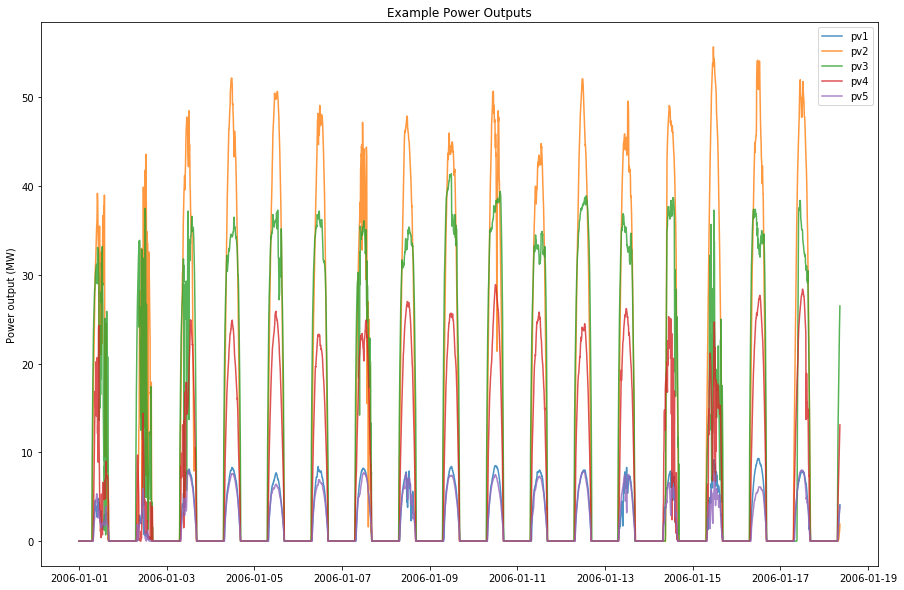

In [6]:
for col in df.columns[:5]:
    plt.plot(df.index[:5000], df[col][:5000], alpha=0.8, label=col)
plt.legend()
plt.title("Example Power Outputs")
plt.ylabel("Power output (MW)");

## Save Data

In [7]:
!rm -rf solar
!rm ca-pv-2006.zip

In [8]:
df.to_csv('california-solar-power.csv')